다층 퍼셉트로 XOR 게이트 구현해보기 #입력값이 같지 않으면 1

데이터 준비하기

In [29]:
import tensorflow as tf
tf.random.set_seed(777) #랜덤 실행할 때마다 똑같은 값 나오게 해줌 동일한 값으로 실험할 수 있도록 

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.losses import mse
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]]) #학습데이터
label = np.array([[0], [1], [1], [0]]) #정답 :입력값이 같지 않으면 1


모델 구성하기

In [30]:
model = Sequential() #모델에다가 층층이 쌓을거고 
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) # 다층 퍼셉트론을 구성합니다  중간은 relu로 가고 극단적으로 꼬
model.add(Dense(1, activation='sigmoid')) #마지막은 시그모이드로 표현 숫자 소숫점 따져서 

모델 설정하기

In [31]:
model.compile(optimizer = RMSprop(), loss = mse, metrics = ['acc']) # list 형태로 평가지표를 전달합니다

모델 확인하기

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


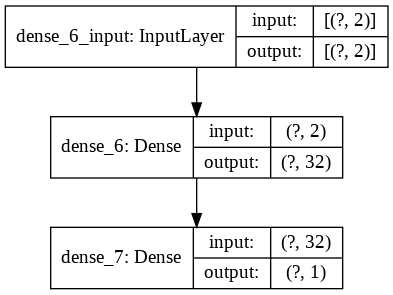

In [32]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

학습시키기

In [33]:
history =model.fit(data, label, epochs =100) #학습데이터, 정답, 100번 공부

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2526 

학습결과 그려보기

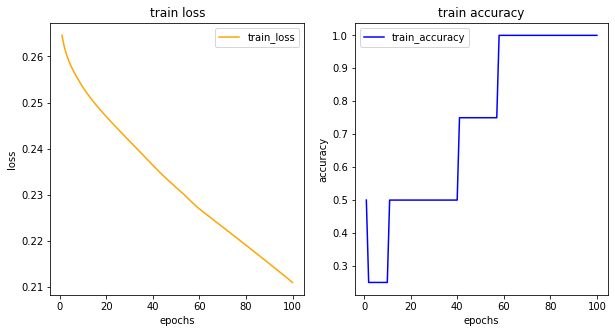

In [34]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

예측하기

In [35]:
result = model.predict(data)
print(result)
#[0,0] [0,1] [1,0] [1,1]
#임계값을 0.5로 설정했을 경우 (default 0.5)
#[[0.48656908] 0.5보다 작음 ->0
#[0.54643035]  0.5보다 큼 ->1
#[0.5521159 ]  0.5보다 큼 ->1
#[0.4465039 ]] 0.5보다 작음 ->0

[[0.48656908]
 [0.54643035]
 [0.5521159 ]
 [0.4465039 ]]


여러가지 활성화 함수 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 하이퍼볼릭탄젠트 함수
def tanh(x):
    return list(map(lambda x : math.tanh(x), x))

# relu 함수
def relu(x):
    result = []
    for ele in x:
        if(ele <= 0):
            result.append(0)
        else:
            result.append(ele)
            
    return result


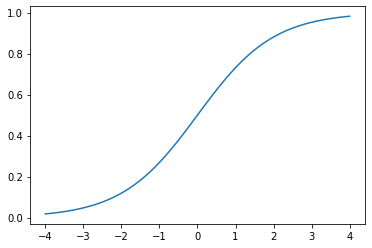

In [37]:
# 시그모이드 함수 그려보기
x = np.linspace(-4, 4, 100)
sig = sigmoid(x)

plt.plot(x, sig)
plt.show()


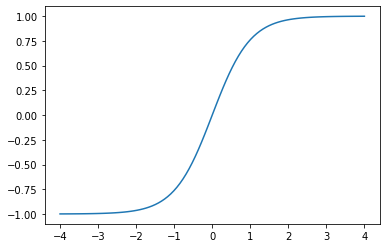

In [38]:
# 하이퍼볼릭탄젠트 함수
x = np.linspace(-4, 4, 100)
sig = tanh(x)

plt.plot(x, sig)
plt.show()


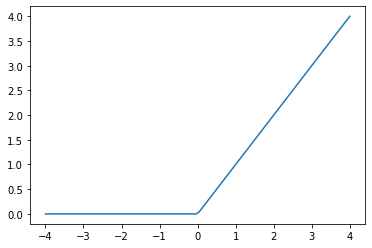

In [39]:
# relu 함수
x = np.linspace(-4, 4, 100)
sig = relu(x)

plt.plot(x, sig)
plt.show()


경사하강법 그리기

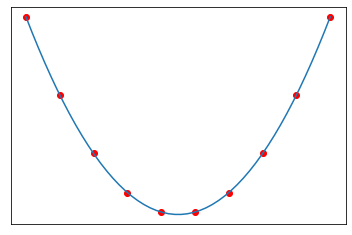

In [40]:
x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

x_2 = np.linspace(-2, 2, 10)
dev_x = [i ** 2 for i in x_2]

plt.plot(x, x_square)
fig = plt.scatter(x_2, dev_x, color = 'red')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


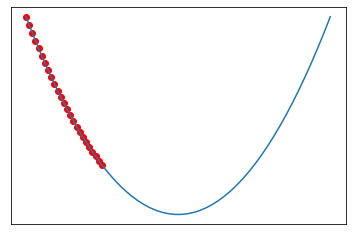

In [41]:
x_2 = np.linspace(-2, -1, 25)
dev_x = [i ** 2 for i in x_2]

plt.plot(x, x_square)
fig = plt.scatter(x_2, dev_x, color = 'red')
# plt.axis()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


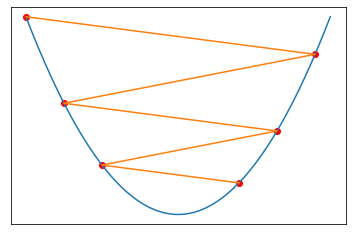

In [42]:
x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

x_2_a = np.linspace(-2, -1, 3)
x_2_b = np.linspace(0.8, 1.8, 3)
x_2 = np.concatenate((x_2_a, x_2_b))
dev_x = [i ** 2 for i in x_2]

a_list = []
b_list = []
for a, b in zip(x_2_a, x_2_b[::-1]):
    a_list.append(a)
    a_list.append(b)
    b_list.append(a ** 2)
    b_list.append(b ** 2)

plt.plot(x, x_square)
fig = plt.scatter(x_2, dev_x, color = 'red')
plt.plot(a_list, b_list)
# plt.axis()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


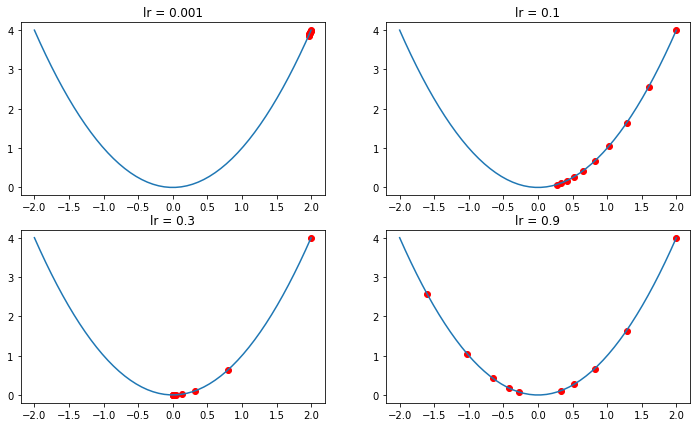

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 여러 가지 학습률을 사용하여 값의 변화를 관찰해보도록 합니다.
lr_list = [0.001, 0.1, 0.3, 0.9]

def get_derivative(lr):
    
    w_old = 2
    derivative = [w_old]

    y = [w_old ** 2] # 손실 함수를 y= x^2 로 정의합니다.

    for i in range(1, 10):
        # 먼저 해당 위치에서 미분값을 구합니다.
        dev_value = w_old * 2

        # 위의 값을 이용하여 가중치를 업데이트합니다.
        w_new = w_old - lr * dev_value
        w_old = w_new

        derivative.append(w_old) # 업데이트 된 가중치를 저장합니다.
        y.append(w_old ** 2) # 업데이트 된 가중치의 손실값을 저장합니다.
        
    return derivative, y

x = np.linspace(-2, 2, 50) # -2 ~ 2의 범위를 50구간으로 나눈 배열을 반환합니다.
x_square = [i ** 2 for i in x]

fig = plt.figure(figsize = (12, 7))

for i, lr in enumerate(lr_list):
    derivative, y = get_derivative(lr)
    ax = fig.add_subplot(2, 2, i + 1)
    ax.scatter(derivative, y, color = 'red')
    ax.plot(x, x_square)
    ax.title.set_text('lr = ' + str(lr))

plt.show()
